# Sentiment analysis using pre-trained language models

## Download Hugging face lib

https://huggingface.co/docs/transformers/v4.15.0/installation

In [1]:
!conda install -c huggingface transformers
!pip install torch
!pip install chardet
!pip install transformers

/bin/bash: line 1: conda: command not found
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.1/311.1 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 35.0 MB/s eta 0:00:00


In [2]:
from transformers import pipeline
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
import numpy as np
from transformers import pipeline, AutoTokenizer
import matplotlib.pyplot as plt

# Download stopwords if not already downloaded
import nltk

classifier = pipeline("sentiment-analysis")
classifier("I am impressed how long this ink last and how fast the seller sent it to me. Not a hitch at all, fantastic.")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9994031190872192}]

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:


file_path = '/content/drive/MyDrive/EE4213/individual assignment/csv/kindle review.csv'  # Update with the actual file path
#file_path = '/content/drive/MyDrive/EE4213/individual assignment/csv/Kobo Libra 2 review.csv'
#file_path = '/content/drive/MyDrive/EE4213/individual assignment/csv/pocketBook review.csv'
df = pd.read_csv(file_path)

review_data = df['review_detail'].tolist()
review_title = df['review_title'].tolist()
rating = df['rate'].tolist()
reviewer = df['name'].tolist()

#review_data_2d = [review_data[i:i+2] for i in range(0, len(review_data), 2)]
print(review_data[0])
print("Length of review_data:", len(review_data))
#print("Length of review_data 11:", len(review_data[11])) #7003 #set max 1800
#for i in range(len(review_data)):


I charge my kindle once every 8 weeks at around 30% from a full charge. I don’t like to keep it in airplane mode so if I turned that on i could probably get 10 weeks.  Battery life is shockingly good!Touch screen: is fine… not great but that’s to be expected with an e-ink tablet. Highlighting can be awkward at times, but I just being nit picky.I’ve never needed the waterproof feature, but it’s nice to have it.The built in light is AMAZING! I schedule the warm light feature past 8pm, usually set to warmth 23. Brightness is usually set to 8 and it is perfect. I read this before bed every night and it helps me wind down, doesn’t strain my eyes, and is so convenient.The kindle is the perfect size and you can take it anywhere.I thought only 8GB of storage would be an issue, but was pleasantly surprised. I rarely have more than 15 books on it at once, and I’ve only used a tiny amount. You could easily store hundreds of books at once on this but since it downloads them so quickly and saves al

In [18]:
positive_count = 0
negative_count = 0
#1st number:+ve, 2nd number:-ve
rating_Comment = [["1.0 out of 5 stars",0,0],["2.0 out of 5 stars",0,0],["3.0 out of 5 stars",0,0],["4.0 out of 5 stars",0,0],["5.0 out of 5 stars",0,0]]
#print(rating_Comment[1][0]) #"2.0 out of 5 stars"
all_data = [] #0:id, 1:reviewer, 2:rating, 3:title, 4:comment, 5:label, 6:score
all_data_columns = ['ID', 'Reviewer', 'Rating', 'Title', 'Comment', 'Label', 'Score']
counter = 0

for i in range(len(review_data)):
    # print(i)
    #print(review_data[i])
    if len(review_data[i]) > 1500:
      for j in range(len(review_data[i])//1500+1):
        output = classifier(review_data[i][j*1500:(j+1)*1500])
        # print(output)
        for result in output:
            if result['label'] == 'POSITIVE':
                for k in range(0,5):
                    if rating[i] == rating_Comment[k][0]:
                        #print(rating[i])
                        rating_Comment[k][1] += 1/((len(review_data[i])//1500)+1)

                positive_count += 1/((len(review_data[i])//1500)+1)
            elif result['label'] == 'NEGATIVE':
                for k in range(0,5):
                    if rating[i] == rating_Comment[k][0]:
                        #print(rating[i])
                        rating_Comment[k][2] += 1/((len(review_data[i])//1500)+1)
                negative_count += 1/((len(review_data[i])//1500)+1)
        all_data.append([0] * 7)
        all_data[counter][0] = i+((j+1)/10)
        all_data[counter][1] = reviewer[i]
        all_data[counter][2] = rating[i]
        all_data[counter][3] = review_title[i]
        all_data[counter][4] = review_data[i][j*1500:(j+1)*1500]
        all_data[counter][5] = result['label']
        all_data[counter][6] = result['score']
        counter += 1
    elif len(review_data[i]) <= 1500:
        output = classifier(review_data[i])
        #print(output)
        for result in output:
            if result['label'] == 'POSITIVE':
                for k in range(0,5):
                    if rating[i] == rating_Comment[k][0]:
                        #print(rating[i])
                        rating_Comment[k][1] += 1
                positive_count += 1
            elif result['label'] == 'NEGATIVE':
                for k in range(0,5):
                    if rating[i] == rating_Comment[k][0]:
                        #print(rating[i])
                        rating_Comment[k][2] += 1
                negative_count += 1
        all_data.append([0] * 7)
        all_data[counter][0] = i
        all_data[counter][1] = reviewer[i]
        all_data[counter][2] = rating[i]
        all_data[counter][3] = review_title[i]
        all_data[counter][4] = review_data[i]
        all_data[counter][5] = result['label']
        all_data[counter][6] = result['score']
        counter += 1

#print(all_data)


print("Positive Count:", positive_count)
print("Negative Count:", negative_count)
# print("Rating:", rating_Comment)

Positive Count: 63.0
Negative Count: 38.0


**Show All Of The Results**

In [19]:
pd.set_option('display.max_columns', None)
df = pd.DataFrame(all_data, columns=all_data_columns)
print(df)

        ID        Reviewer              Rating  \
0      0.1          Lisa F  5.0 out of 5 stars   
1      0.2          Lisa F  5.0 out of 5 stars   
2      1.0      L. Atkeson  2.0 out of 5 stars   
3      2.0   roger bass jr  5.0 out of 5 stars   
4      3.0    George Gibbs  2.0 out of 5 stars   
..     ...             ...                 ...   
103   96.0  James J Gorman  4.0 out of 5 stars   
104   97.0      A. Version  5.0 out of 5 stars   
105   98.0  Mary A. Violet  5.0 out of 5 stars   
106   99.0        Ana Gann  5.0 out of 5 stars   
107  100.0  BeautyBySimone  5.0 out of 5 stars   

                                                 Title  \
0    Never thought I’d say this, but this is better...   
1    Never thought I’d say this, but this is better...   
2          The Damn thing has ADDS!  A $175 git ADDS!!   
3                                       Love my kindle   
4                   These things don't last very long.   
..                                                 

**Show the graph: "Number of comments in different rating"**

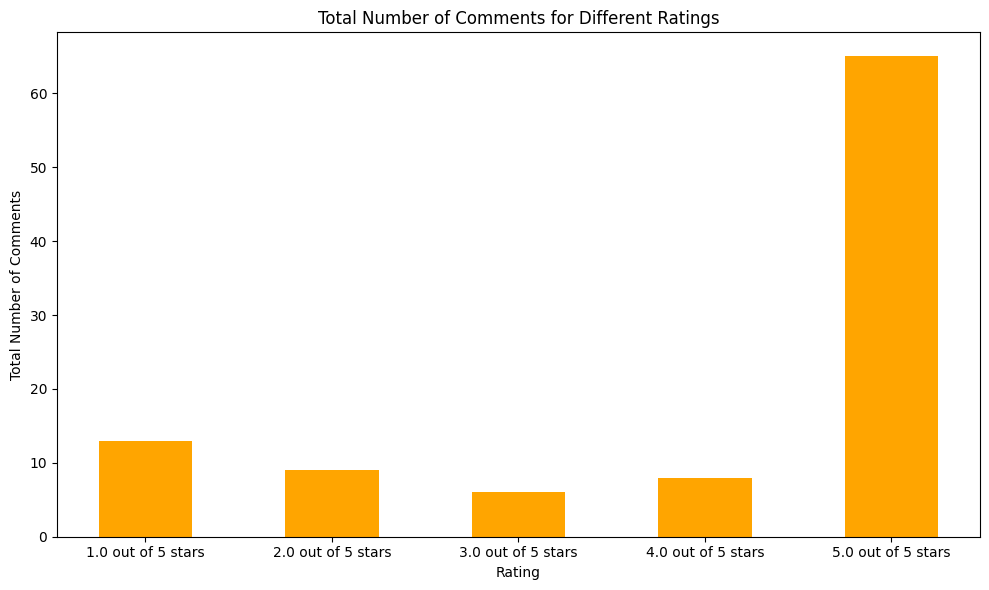

In [20]:
# Rating data
#Rating = [['1.0 out of 5 stars', 2, 19.0], ['2.0 out of 5 stars', 1, 9.0], ['3.0 out of 5 stars', 0, 5], ['4.0 out of 5 stars', 6.5, 3.5], ['5.0 out of 5 stars', 47.06666666666667, 6.933333333333334]]
Rating = rating_Comment

# Extracting data for plotting
x = [item[0] for item in Rating]
y_positive = [item[1] for item in Rating]
y_negative = [item[2] for item in Rating]

# Calculate the total number of comments
total_comments = [positive + negative for positive, negative in zip(y_positive, y_negative)]

# Increase figure size
plt.figure(figsize=(10, 6))

# Set the width of the bars
bar_width = 0.5

# Plotting the bar chart
plt.bar(x, total_comments, color='orange', width=bar_width)

# Adjust x-axis tick positions
#plt.xticks(rotation=45, ha='right')

# Adding labels and title
plt.xlabel('Rating')
plt.ylabel('Total Number of Comments')
plt.title('Total Number of Comments for Different Ratings')

# Displaying the plot
plt.tight_layout()
plt.show()

**Show the graph: "Positive and Negative Counts by Rating"**

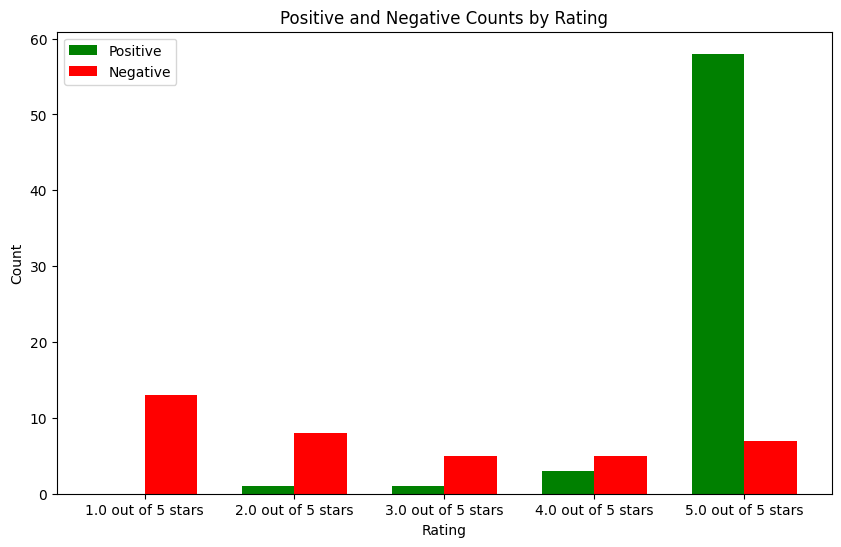

Rating: [['1.0 out of 5 stars', 0, 13.0], ['2.0 out of 5 stars', 1, 8], ['3.0 out of 5 stars', 1, 5], ['4.0 out of 5 stars', 3.0, 5.0], ['5.0 out of 5 stars', 58.0, 7]]


In [21]:

x = [item[0] for item in rating_Comment]
y_positive = [item[1] for item in rating_Comment]
y_negative = [item[2] for item in rating_Comment]

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = np.arange(len(x))
r2 = [x + bar_width for x in r1]

# Increase figure size
plt.figure(figsize=(10, 6))

# Plotting the bars
plt.bar(r1, y_positive, color='green', width=bar_width, label='Positive', align='center')
plt.bar(r2, y_negative, color='red', width=bar_width, label='Negative', align='center')

# Adding x-axis labels
plt.xticks([r + bar_width/2 for r in r1], x)

# Adding labels and title
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Positive and Negative Counts by Rating')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()
print("Rating:", rating_Comment)

**Show the words with many appearance in both positive and negative comments (Neglect stopwords (eg: I, to, for))**

In [22]:
nltk.download('stopwords')
nltk.download('punkt')

# Get the list of stopwords
stop_words = set(stopwords.words('english'))

# Positive and Negative word counters
positive_words = Counter()
negative_words = Counter()

# Iterate over all_data to count words for each label
for data in all_data:
    comment = data[4]  # Comment is at index 4
    label = data[5]  # Label is at index 5

    # Tokenize the comment into words
    words = word_tokenize(comment)

    # Remove stopwords and filter out common words
    filtered_words = [word.lower() for word in words if word.lower() not in stop_words and word.isalpha()]

    # Update the word counter based on the label
    if label == 'POSITIVE':
        positive_words.update(filtered_words)
    elif label == 'NEGATIVE':
        negative_words.update(filtered_words)

# Get the top 5 most common words for POSITIVE label
top_positive_words = positive_words.most_common(30)

# Get the top 5 most common words for NEGATIVE label
top_negative_words = negative_words.most_common(30)

print("Top 30 words in POSITIVE comments:")
for word, count in top_positive_words:
    print(f"{word}: {count}")

print("Top 30 words in NEGATIVE comments:")
for word, count in top_negative_words:
    print(f"{word}: {count}")

Top 30 words in POSITIVE comments:
kindle: 61
read: 33
reading: 33
love: 33
like: 24
one: 24
books: 21
book: 18
screen: 17
great: 16
light: 16
size: 15
battery: 14
life: 14
take: 13
charge: 12
easy: 12
get: 11
paperwhite: 11
time: 10
really: 9
even: 9
got: 9
long: 9
also: 8
bought: 8
day: 8
best: 8
use: 8
every: 7
Top 30 words in NEGATIVE comments:
kindle: 54
read: 20
like: 19
reading: 19
books: 19
get: 18
one: 16
amazon: 16
book: 16
would: 15
want: 14
screen: 14
also: 12
paperwhite: 10
lot: 10
service: 10
buy: 9
without: 9
page: 9
much: 9
another: 9
still: 9
customer: 9
battery: 9
well: 8
love: 8
really: 8
bought: 8
light: 8
time: 8


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
